![Consulting](https://raw.githubusercontent.com/fionanealon/Boston-Housing-dataset/master/images/newhousesforsales.JPG)

**Create a git repository and make it available online for the lecturer
to clone. The repository should contain all your work for this assessment. Within
the repository, create a jupyter [6] notebook that uses descriptive statistics and
plots to describe the Boston House Prices [1] dataset. This part is worth 20% of
your overall mark.**

In [1]:
# Pandas is Python package for analysing and manipluating dataframes
import pandas as pd
# Numpy is Python package for performing calculations on numerical arrays
import numpy as np
# Seaborn is a Python package for creating plots.
import seaborn as sns
# The stats subpackage of the scipy package contains a library of statistical functions.
import scipy.stats as ss
# Pyplot is a graphical subpackage of matplotlib for creating plots.
import matplotlib.pyplot as plt
# Keras is a neural network library for machine learning
import keras as kr
# The model_slection subpackage of the scikit-learn package creates a model for your neural network
import sklearn.model_selection as mod
# The preprocessing subpackage of the scikit-learn package "scales" the data for your neural network
import sklearn.preprocessing as pre
# The decomposition subpackage of the scikit-learn package "whitens" the data for your neural network
import sklearn.decomposition as dec
# The model_selection subpackage of the scikit-learn package creates a model for your neural network
import sklearn.model_selection as mod
# The linear_model subpackage of the scikit-learn package creates a models for linear regression
import sklearn.linear_model as lm
%matplotlib inline

Using TensorFlow backend.


In [2]:
# Make the plots bigger.
plt.rcParams['figure.figsize'] = (10.0, 10.0)

In [3]:
# From the stats subpackage of the scipy package import the kurtosis, skew 
from scipy.stats import kurtosis, skew
# From the datasets subpackage of the scikit-learn package import the boston housing datset
from sklearn.datasets import load_boston
# From the model_slection subpackage of the scikit-learn package import train_test_split for training the neural network
from sklearn.model_selection import train_test_split
# From the linear_modelsubpackage of the scikit-learn package import LinearRegression class
from sklearn.linear_model import LinearRegression

In [4]:
# Assign load_boston() to the variable boston
boston = load_boston()
# Assign data to the variable bodataston
data = boston.data
# Create a pandas datafram using the sata varaibale and boston features as column names
data = pd.DataFrame(data = data, columns= boston.feature_names)
# Add a column called Price which is the bosotn datset target variable
data['Price'] = boston.target

In [5]:
# Set global parameter for using ggplot plotting style
plt.style.use('ggplot')
# Set the size of plots
plt.rcParams['figure.figsize'] = 14, 10

# Introduction

The boston housing dataset contains information collected by the U.S. Census Service relating to housing in the Boston area. IT is very famous and has been used extensively to benchmark algorithms. It was originally part of the UCI Machine Learning Repository. The dataset is quite small in size and contains only 506 cases with 14 attributes.

We can now access this dataset in the scikit-learn library. This library contains 506 samples and 13 feature variables. The goal is to predict the price of the houses using the given features. In the below section, I am using the scikit learn library to describe the contents contained within thin this datset. [Ref: Boston Housing Dataset](https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155)

In [6]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
boston = load_boston()
print(boston.data.shape) #get (numer of rows, number of columns or 'features')
print(boston.DESCR) #get a description of the dataset

(506, 13)
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - P

See below a pairplot from the seaborn package. A pairplot allows us to see both distribution of single variables and relationships between two variables. [Ref: pairplot](https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166)

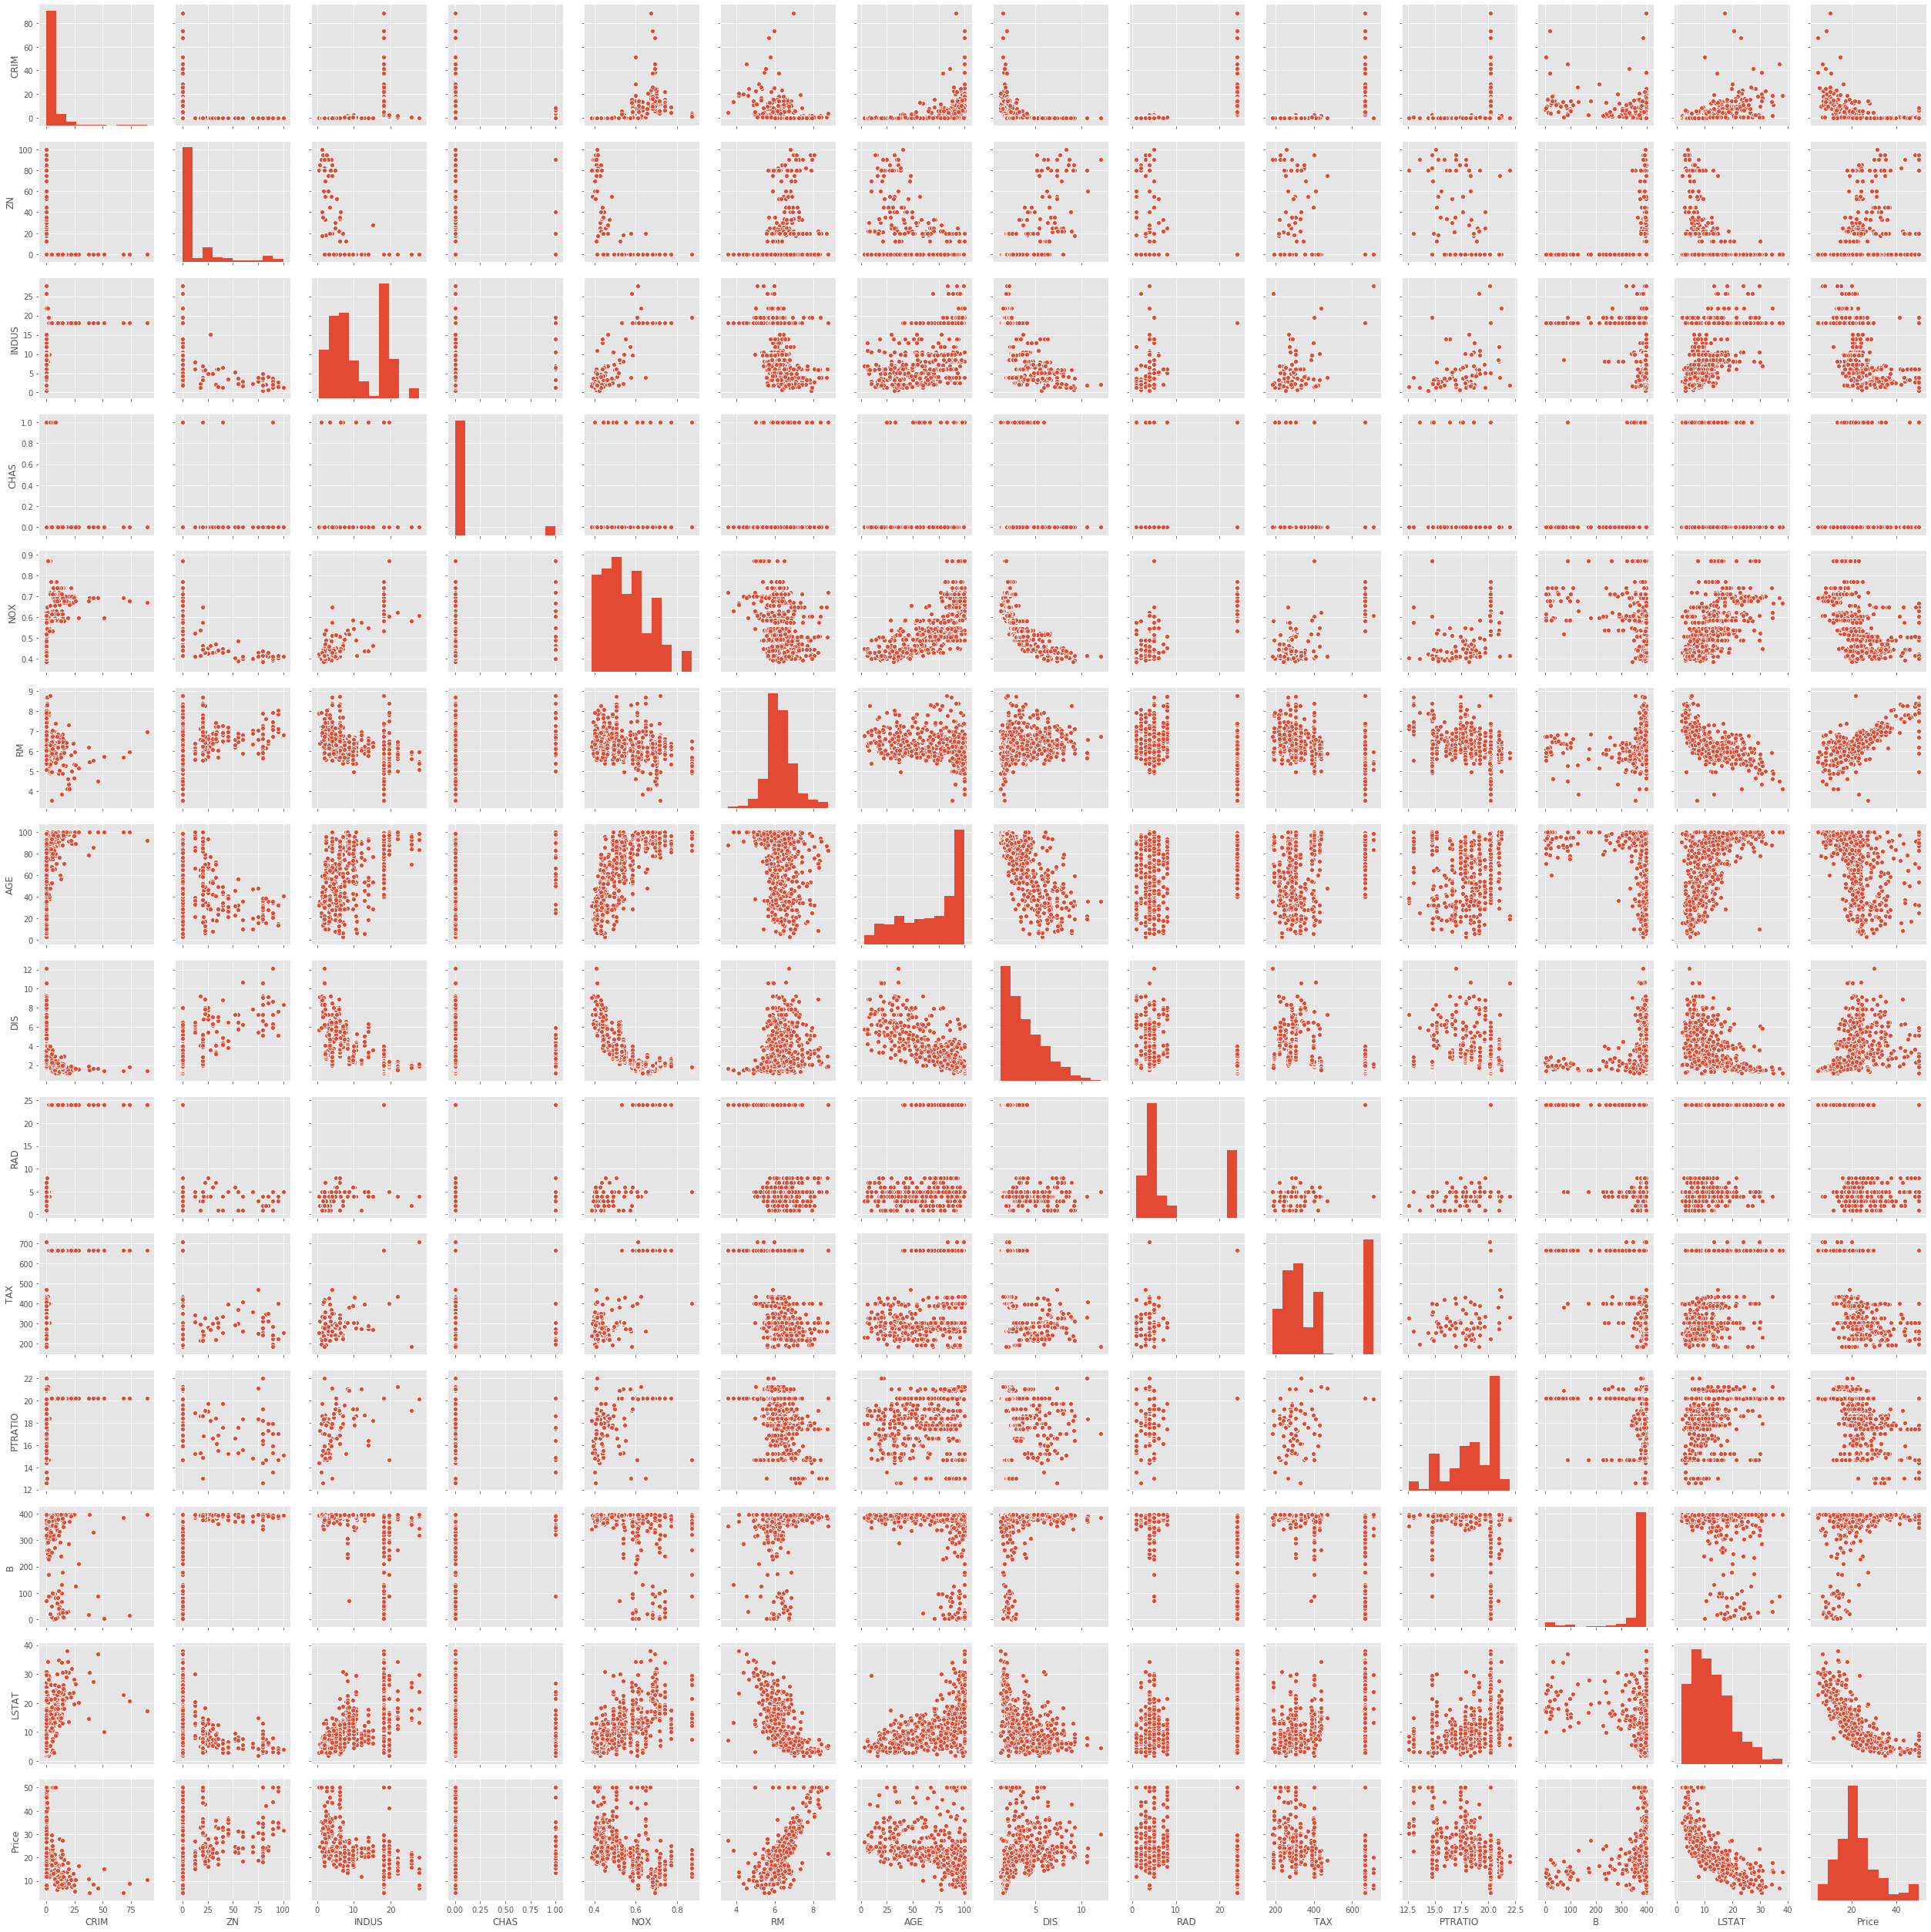

In [8]:
# From Seaborn, create a pairplot of data
sns.pairplot(data)
# Show the plot
plt.show()

## What is descriptive statistics?

Descriptive statistics is the term given to the analysis of data that helps describe, show or summarize data in a meaningful way such that, for example, patterns might emerge from the data. Descriptive statistics do not, however, allow us to make conclusions beyond the data we have analysed or reach conclusions regarding any hypotheses we might have made. They are simply a way to describe our data.[Ref: Descriptive Statistics](https://statistics.laerd.com/statistical-guides/descriptive-inferential-statistics.php)

There are four major types of descriptive statistics [Ref: Types of Descriptive Statistics](https://baselinesupport.campuslabs.com/hc/en-us/articles/204305665-Types-of-Descriptive-Statistics)

1. Measures of Frequency
2. Measures of Central Tendency
3. Measures of Dispersion or Variation
4. Measures of Assosciation

### 1. Measures of Frequency

Frequency statistics simply count the number of times that each variable occurs. [Ref: Frequency](http://korbedpsych.com/R17bDescriptive.html)

See the table which the count of the number of samples for each of the variables in the boston dataset.

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


### 2. Measures of Central Tendency

Measures of central tendency are the most basic and, often, the most informative description of a population's characteristics. They describe the "average" member of the population of interest. There are three measures of central tendency:

- Mean -- the sum of a variable's values divided by the total number of values
- Median -- the middle value of a variable
- Mode -- the value that occurs most often [Ref: Central Tendency](https://www.researchconnections.org/childcare/datamethods/descriptivestats.jsp)

See below the measures of central tendency for the variables in the boston dataset.

#### Mean

In [10]:
# Find the standard variation of the dataframe
data.mean()

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
Price       22.532806
dtype: float64

#### Median

In [11]:
# Find the median of the dataframe
data.median()

CRIM         0.25651
ZN           0.00000
INDUS        9.69000
CHAS         0.00000
NOX          0.53800
RM           6.20850
AGE         77.50000
DIS          3.20745
RAD          5.00000
TAX        330.00000
PTRATIO     19.05000
B          391.44000
LSTAT       11.36000
Price       21.20000
dtype: float64

#### Mode

In [12]:
# Find the mode of the dataframe
data.mode()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.01501,0.0,18.1,0.0,0.538,5.713,100.0,3.4952,24.0,666.0,20.2,396.9,6.36,50.0
1,14.33370,NaN,NaN,NaN,NaN,6.127,NaN,NaN,NaN,NaN,NaN,NaN,7.79,NaN
2,NaN,NaN,NaN,NaN,NaN,6.167,NaN,NaN,NaN,NaN,NaN,NaN,8.05,NaN
3,NaN,NaN,NaN,NaN,NaN,6.229,NaN,NaN,NaN,NaN,NaN,NaN,14.10,NaN
4,NaN,NaN,NaN,NaN,NaN,6.405,NaN,NaN,NaN,NaN,NaN,NaN,18.13,NaN
5,NaN,NaN,NaN,NaN,NaN,6.417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Histogram

A histogram is a type of vertical bar graph in which the bars represent grouped continuous data. The shape of a histogram can tell you a lot about the distribution of the data, as well as provide you with information about the mean, median, and mode of the data set. [Ref: histogram](https://www.ck12.org/statistics/histograms/lesson/Histograms-BSC-PST/)

See below a set of histograms of all the variables from the dataset.

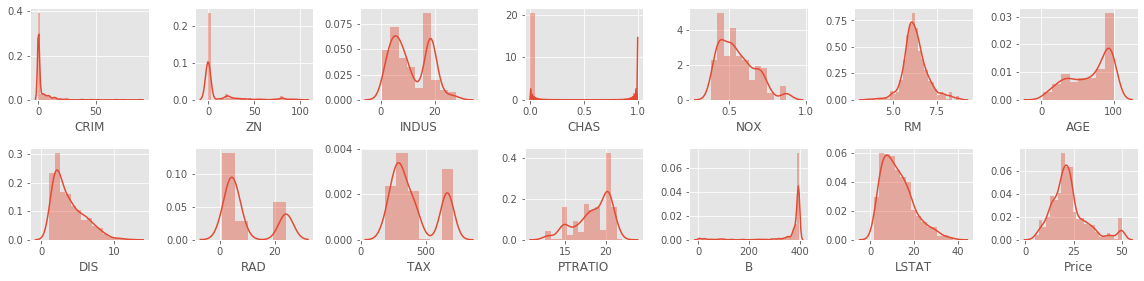

In [13]:
# include distplot for all features in one plot which 2 rows long & 7 columns wide
rows = 2
cols = 7

# Plot the features
fig, ax  = plt.subplots(nrows= rows, ncols= cols, figsize = (16,4))

# Assign col to dataframe columns
col = data.columns
index = 0

# loop through the dataframe and create a plot for each feature
for i in range(rows):
    for j in range(cols):
        sns.distplot(data[col[index]], ax = ax[i][j])
        index = index + 1


# Show plot in tight layout
plt.tight_layout()

### 3. Measures of Dispersion or Variation

Measures of Dispersion
Measures of dispersion provide information about the spread of a variable's values. [Ref: Dispersion](https://www.researchconnections.org/childcare/datamethods/descriptivestats.jsp) There are four key measures of dispersion:

- Range
- Variance
- Standard Deviation
- Skew

**Range** is simply the difference between the smallest and largest values in the data. The interquartile range is the difference between the values at the 75th percentile and the 25th percentile of the data.

**Variance** is the most commonly used measure of dispersion. It is calculated by taking the average of the squared differences between each value and the mean.

**Standard deviation**, another commonly used statistic, is the square root of the variance.

**Skew** is a measure of whether some values of a variable are extremely different from the majority of the values. For example, income is skewed because most people make between 0 and 200,000, but a handful of people earn millions. A variable is positively skewed if the extreme values are higher than the majority of values. A variable is negatively skewed if the extreme values are lower than the majority of values.

**Kurtosis** Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is, data sets with high kurtosis tend to have heavy tails, or outliers. Data sets with low kurtosis tend to have light tails, or lack of outliers. A uniform distribution would be the extreme case. [Ref:Kurtosis](https://www.itl.nist.gov/div898/handbook/eda/section3/eda35b.htm)

#### Range

A boxplot splits the data set into quartiles. The body of the boxplot consists of a "box" (hence, the name), which goes from the first quartile (Q1) to the third quartile (Q3).

See below a boxplot of the boston housing dataset.

Boxplots display two common measures of the variability or spread in a data set.

- Range. If you are interested in the spread of all the data, it is represented on a boxplot by the horizontal distance between the smallest value and the largest value, including any outliers.

- Interquartile range (IQR). The middle half of a data set falls within the interquartile range. [Ref: boxplot](https://stattrek.com/statistics/charts/boxplot.aspx)

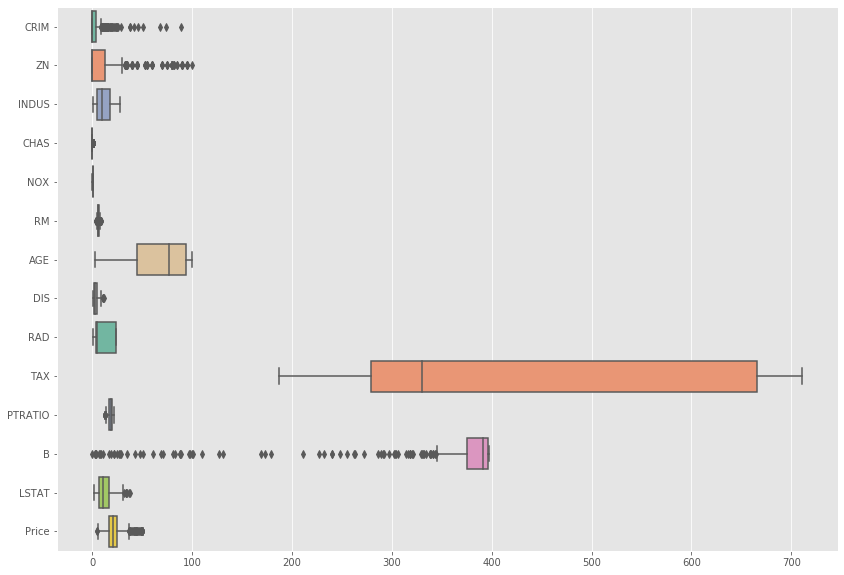

In [14]:
# Use seaborn to plot a boxplot of the boston dataset
ax = sns.boxplot(data=data, orient="h", palette="Set2")

#### Variance

In [15]:
# Find the variance of the dataframe
data.var()

CRIM          73.986578
ZN           543.936814
INDUS         47.064442
CHAS           0.064513
NOX            0.013428
RM             0.493671
AGE          792.358399
DIS            4.434015
RAD           75.816366
TAX        28404.759488
PTRATIO        4.686989
B           8334.752263
LSTAT         50.994760
Price         84.586724
dtype: float64

#### Standard deviation

In [16]:
# Find the standard variation of the dataframe
data.std()

CRIM         8.601545
ZN          23.322453
INDUS        6.860353
CHAS         0.253994
NOX          0.115878
RM           0.702617
AGE         28.148861
DIS          2.105710
RAD          8.707259
TAX        168.537116
PTRATIO      2.164946
B           91.294864
LSTAT        7.141062
Price        9.197104
dtype: float64

#### Skewness

In [17]:
data.skew()

CRIM       5.223149
ZN         2.225666
INDUS      0.295022
CHAS       3.405904
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
Price      1.108098
dtype: float64

#### Kurtosis

In [18]:
data.kurtosis()

CRIM       37.130509
ZN          4.031510
INDUS      -1.233540
CHAS        9.638264
NOX        -0.064667
RM          1.891500
AGE        -0.967716
DIS         0.487941
RAD        -0.867232
TAX        -1.142408
PTRATIO    -0.285091
B           7.226818
LSTAT       0.493240
Price       1.495197
dtype: float64

### 4. Measures of Association

Measures of association indicate whether two variables are related. The most commonly used measure is correlation. [ef: Correlation](https://www.researchconnections.org/childcare/datamethods/descriptivestats.jsp)

**Correlation** A correlation coefficient is used to measure the strength of the relationship between numeric variables (e.g., weight and height)
The most common correlation coefficient is Pearson's r, which can range from -1 to +1.
If the coefficient is between 0 and 1, as one variable increases, the other also increases. This is called a positive correlation. For example, height and weight are positively correlated because taller people usually weigh more
If the correlation coefficient is between -1 and 0, as one variable increases the other decreases. This is called a negative correlation. For example, age and hours slept per night are negatively correlated because older people usually sleep fewer hours per night

#### Correlation

In [19]:
corrmat = data.corr()
corrmat

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


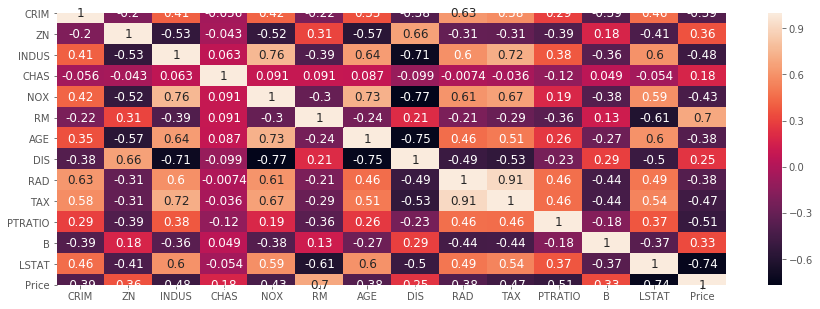

In [20]:
# Use seaborn to plot of the correlated values within the dataset
fig, ax = plt.subplots(figsize = (15,5))
sns.heatmap(corrmat, annot = True, annot_kws={'size': 12})

![skewness](https://raw.githubusercontent.com/fionanealon/Boston-Housing-dataset/master/images/skewness.jpg)

**Infer: To the above jupyter notebook, add a section where you use inferential
statistics to analyse whether there is a significant difference in median house prices
between houses that are along the Charles river and those that aren’t. You should
explain and discuss your findings within the notebook. This part is also worth
20%.**


## What is Inferential Statistics?

Inferential statistics allows you to make inferences about the population from the sample data. A sample is a representative subset of a population. [Ref: Inferential Stats:](https://towardsdatascience.com/inferential-statistics-for-data-science-b0075670fc8a)

In this section, I will review the 'on charles river' and 'not on charles river' samples from the Price population to analyse whether here is a significant difference in median house prices between those that are and those that aren't.

### Load data

In [21]:
# Read in the housing dataset into a pandas dataframe called df
df = pd.read_csv("https://raw.githubusercontent.com/fionanealon/datasets/master/housing.csv")
# Take a look at the first 5 lines of the dataframe
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In the below code snippet, I will an additional column to the dataset called 'RIVER'. These values are idenitical to the values stored in 'CHAS' but they will be stored as integer values.

In [22]:
# Add a new column called 'River' and assign it's values as integers of the values contained in the 'CHAS' column
df['RIVER'] = df['CHAS'].astype(np.int)
# Show the first 5 lines
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,RIVER
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0


#### Mean

In this section, I will calculate the mean of the house prices both on the river and not on the river by using the pandas groupby function.

In [23]:
# Find the mean of the 'on river' and 'not on river classes' contained in the 'River' column
df.groupby('RIVER').mean().PRICE 

RIVER
0    22.093843
1    28.440000
Name: PRICE, dtype: float64

#### Median

In this section, I will calculate the median of the house prices both on the river and not on the river by using the pandas groupby function.

In [24]:
# Find the median of the 'on river' and 'not on river classes' contained in the 'River' column
df.groupby('RIVER').median().PRICE 

RIVER
0    20.9
1    23.3
Name: PRICE, dtype: float64

#### Standard deviation

In this section, I will calculate the standard deviation of the house prices both on the river and not on the river by using the pandas groupby function.

In [25]:
# Find the standard deviation of the 'on river' and 'not on river classes' contained in the 'River' column
df.groupby('RIVER').std().PRICE 

RIVER
0     8.831362
1    11.816643
Name: PRICE, dtype: float64

#### Catplot

Catplot shows frequencies (or optionally fractions or percents) of the categories of one, two or three categorical variables. [Ref; Catplot](https://ideas.repec.org/c/boc/bocode/s431501.html)

The below catplot of house prices on and off the Charles river might suggest that house prices on the Charles river are centred around it's mean and median values. However, the catplot also shows that there is a large spread of house prices values for houses not on the river.

In order to better understand, the spread of data contained in 'Price', I'm going to plot a histogram.

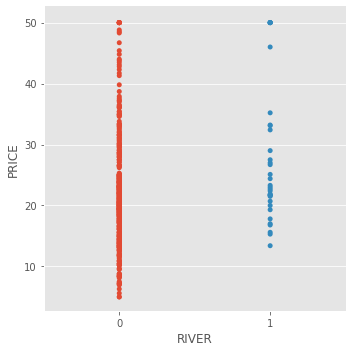

In [26]:
# From the seaborn package, plot a catplot
sns.catplot(x='RIVER', y='PRICE', jitter=False, data=df)

#### Histogram

The below histogram contains 2 subplots, one subplot for house prices on the Charles river (blue) and one subplot for house prices not on the Charles river (orange). Neither of the plots on the histograms are symmetrically distributed. Symmetrical distribution is a situation in which the values of variables occur at regular frequencies, and the mean, median and mode occur at the same point. [Ref Symmetrical distribution](https://www.tutorialspoint.com/mean_median_and_mode/finding_mean_of_symmetric_distribution.html)

Both plots appear to be positively skewed. Positive Skewness means when the tail on the right side of the distribution is longer or fatter. The mean and median will be greater than the mode. [Ref: Positive Skewness](https://codeburst.io/2-important-statistics-terms-you-need-to-know-in-data-science-skewness-and-kurtosis-388fef94eeaa)

On the histogram, I have plotted the means and the medians for each sample. Upon review of the plot, I can see the medians are not the same for each sample.

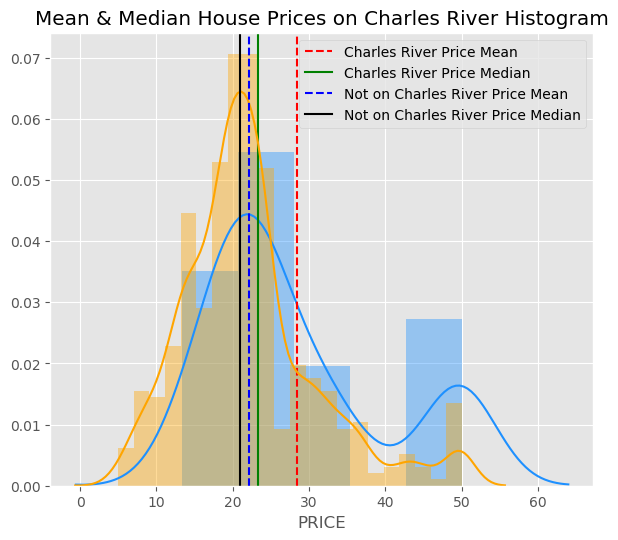

In [27]:
# Create a kernel density plot for the on charles river and not on charles river populations in the 'Price' column
# Adapted from https://www.machinelearningplus.com/plots/matplotlib-histogram-python-examples/
f, (ax_hist) = plt.subplots(figsize=(7,6), dpi=100)

# Set the parameters for the two populations
rivermean=28.44
rivermedian=23.3
notonrivermean=22.09
notonrivermedian=20.9

# Create a 'distplot' for the on charles river and not on charles river populations in the'Price' column
# Adapted from https://stackoverflow.com/questions/51417483/mean-median-mode-lines-showing-only-in-last-graph-in-seaborn
sns.distplot( df.loc[df.RIVER == 1, "PRICE"],  ax=ax_hist , color="dodgerblue", label="On Charles River")
ax_hist.axvline(rivermean, color='r', linestyle='--')
ax_hist.axvline(rivermedian, color='g', linestyle='-')

sns.distplot( df.loc[df.RIVER == 0, "PRICE"],  ax=ax_hist , color="orange", label="Not On Charles River")
ax_hist.axvline(notonrivermean, color='b', linestyle='--')
ax_hist.axvline(notonrivermedian, color='k', linestyle='-')

# Add a legend to the plot
plt.legend({'Charles River Price Mean':rivermean,'Charles River Price Median':rivermedian, 'Not on Charles River Price Mean':notonrivermean, 'Not on Charles River Price Median':notonrivermedian})

# Add a title to the plot
plt.title('Mean & Median House Prices on Charles River Histogram')

# Display the plot
plt.show()

In [28]:
# Assign the 'on river' prices to variable o
o = df[df['RIVER'] == 1]['PRICE']
# Assign the 'not on river' prices to variable n
n = df[df['RIVER'] == 0]['PRICE']

#### Kurtosis

Kurtosis is all about the tails of the distribution — not the peakedness or flatness. It is used to describe the extreme values in one versus the other tail. It is actually the measure of outliers present in the distribution. [Ref:Kurtosis](https://codeburst.io/2-important-statistics-terms-you-need-to-know-in-data-science-skewness-and-kurtosis-388fef94eeaa)

- High kurtosis in a data set is an indicator that data has heavy tails or outliers. If there is a high kurtosis, then, we need to investigate why do we have so many outliers. It indicates a lot of things, maybe wrong data entry or other things. Investigate!
- Low kurtosis in a data set is an indicator that data has light tails or lack of outliers. If we get low kurtosis(too good to be true), then also we need to investigate and trim the dataset of unwanted results.

From the histogram, the peak of the best line fit for the not on the charles prices is much higher than the best line fit for the on the charles prices. Therefore we can summise that the medians are unlikely to be the same.

In [29]:
# Using the kurtosis subpackage from the scip stats package, calculate the kurtosis of the 'on river' population
kurtosis(o)

-0.5438936600086546

In [30]:
# Using the kurtosis subpackage from the scip stats package, calculate the kurtosis of the 'on river' population
kurtosis(n)

1.512342873001833

#### Skewness

#### On-river price skewness

If the skewness is between -1 and -0.5(negatively skewed) or between 0.5 and 1(positively skewed), the data are moderately skewed.

In [31]:
# Using the skew subpackage from the scipy stats package, calculate the skew of the 'on river' population
skew(o)

0.9021059082456354

#### Not on-river price skewness

If the skewness is less than -1(negatively skewed) or greater than 1(positively skewed), the data are highly skewed.

In [32]:
# Using the skew subpackage from the scip stats package, calculate the skew of the 'not on river' population
skew(n)

1.0535392064190594

The skewness of prices on the Charles river is different to the skewness of prices not on the Charles river. Therefore, their medians are inlikely to be the same.

#### Mann Whitney Test

#### Resaon for selecting the Mann Whitney U test

The assumptions of Mood’s median test are that the data from each population is an independent random sample and the population distributions have the same shape. [Ref: Mood](https://www.isixsigma.com/tools-templates/hypothesis-testing/understanding-uses-moods-median-test/)

In [33]:
# Use the stats subpackage of the scipy package to calculate the Mann Whitney U test
ss.mood(o, n)

(0.740803206669186, 0.45881277060047454)

Moods median test p-value: 0.45881277060047454

**Null hypothesis** = There is no difference between the medians of each sample

**Alternative hypothesis** = There is a difference between the medians of each sample

**Level of risk** = $$ α  0.05 $$

As the p-value returned from the hypothesis is below the level of risk value. Therefore, we can summise that the median prices on the charles river are not the same as the median house prices not on the charles river.

![keras](https://raw.githubusercontent.com/fionanealon/Boston-Housing-dataset/master/images/keras.JPG)

**(60%) Predict: Again using the same notebook, use keras to create a neural network that can predict the median house price based on the other variables in the dataset. You are free to interpret this as you wish — for example, you may use all the other variables, or select a subset. This part is worth 60%.**


## What is a neural network?

A **neural network** is a series of algorithms that endeavors to recognize underlying relationships in a set of data through a process that mimics the way the human brain operates. In this sense, neural networks refer to systems of neurons, either organic or artificial in nature. Neural networks can adapt to changing input; so the network generates the best possible result without needing to redesign the output criteria. Neural networks are a key element in the concept of artificial intelligence. [Ref: Neural Network](https://www.investopedia.com/terms/n/neuralnetwork.asp)


**Keras** is a machine learning library for python which assists in creating neural networks, training neural networks, making predictions in neural networks and evalutaing these neural networks.

**Layer** is a general term that applies to a collection of 'nodes' operating together at a specific depth within a neural network.

The **input layer** is contains your raw data (you can think of each variable as a 'node').

The **hidden layer(s)** are where the black magic happens in neural networks. Each layer is trying to learn different aspects about the data by minimizing an error/cost function. The most intuitive way to understand these layers is in the context of 'image recognition' such as a face. The first layer may learn edge detection, the second may detect eyes, third a nose, etc. This is not exactly what is happening but the idea is to break the problem up in to components that different levels of abstraction can piece together much like our own brains work (hence the name 'neural networks').

The **output layer** is the simplest, usually consisting of a single output for classification problems. Although it is a single 'node' it is still considered a layer in a neural network as it could contain multiple nodes. [Ref:Layers of a Neural Network](https://stackoverflow.com/questions/35345191/what-is-a-layer-in-a-neural-network)

See below diagram of a neural network which visualsises it's input, hidden and output layers.

![neural](https://raw.githubusercontent.com/fionanealon/Boston-Housing-dataset/master/images/neural.png)

## Load data

In [34]:
# Read in the housing.csv file into a pandas dataframe
df = pd.read_csv("https://raw.githubusercontent.com/fionanealon/datasets/master/housing.csv")
# Take a look at the first 5 lines of the df dataframe
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Assess the Boston housing dataset features

### Distribution

In the below graph, see a visual representation of the distributions of the features of the Boston housing dataset. The plot contains 14 histograms. A histogram is a graphical display where the data is grouped into ranges and then plotted as bars. The height of each bar shows how many are in each range. [Ref: Histogram](https://www.mathsisfun.com/definitions/histogram.html)


Upon review of the distributions within my plot, I can see that the distributions for a lot of features are highly skewed e.g. CRIM and ZN. These features would not be favorable features to include in our neural network. Features such as the RM feature would be more suitable as this histogram contains a normal distibution. Other favorable features include TAX, DIS, PTRATIO and LSTAT as their distributions are not highly skewed. 

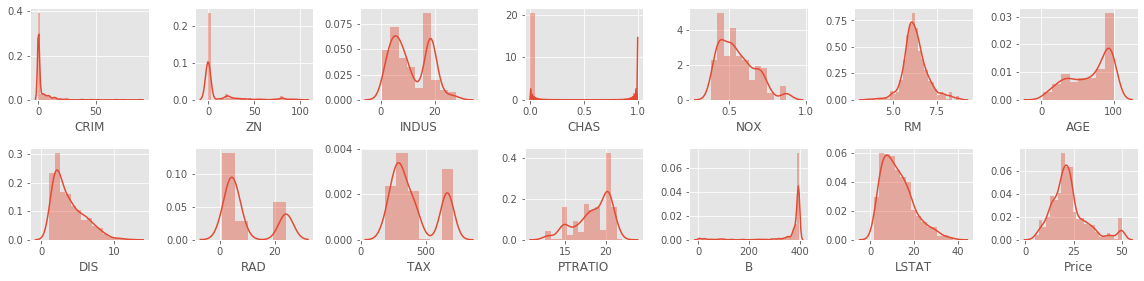

In [35]:
# include distplot for all features in one plot which 2 rows long & 7 columns wide
rows = 2
cols = 7

# Plot the features
fig, ax  = plt.subplots(nrows= rows, ncols= cols, figsize = (16,4))

# Assign col to dataframe columns
col = data.columns
index = 0

# loop through the dataframe and create a plot for each feature
for i in range(rows):
    for j in range(cols):
        sns.distplot(data[col[index]], ax = ax[i][j])
        index = index + 1


# Show plot in tight layout
plt.tight_layout()

### Correlation

Upon review of the distributions of the features, I have observed that the most favorable inputs to include in my neurol network would be RM, PTRATIO and LSTAT. The reason why I have chosen these features is because their distributions are close to normal. Features with normal distributions are preferred is because these features have a high chance of being correlated with the target variable which also has a normal distribution. In this section, I will calculate the correlation of these features to validate my observation. 

The below correlation matrix which shows the relationship between the variables in the Boston housing dataset. Any value greater than 0 indicates a relationship between two variables. LSTAT has a correlation value of -0.73 with Price, RM has a correlation value of 0.69 with Price and PTRATIO has a correlation value of 0.69 with Price which suggests they have a string relationship with the target variable Price.

#### Correlation Matrix

In [36]:
corrmat = data.corr()
corrmat

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In the below block of code, I have called a function called getCorrelatedFeature to loop through all the correlated values in Price and to find all values above a .50 threshold. The values which were returned include - RM, LSTAT and PTRATIO.

In [37]:
# Define a function called getCorrelatedFeature with variables corrdata and threshold
def getCorrelatedFeature(corrdata, threshold):
    feature = []
    value = []
    
    # Loop through the correlation matrix and find correlation values greater than threshold variable
    for i, index in enumerate(corrdata.index):
         if abs(corrdata[index])> threshold:
                feature.append(index)
                value.append(corrdata[index])
    
    # Stores these values in a pandas dataframe
    df = pd.DataFrame(data = value, index = feature, columns=['Corr Value'])
    return df

In [38]:
# Assign a value of 0.50 to the variable threshold
threshold = 0.50
# Assign the correlated values obtained from the getCorrelatedFeature function to variable corrvalue
corr_value = getCorrelatedFeature(corrmat['Price'], threshold)
# Take a look at corr_value
corr_value

,Corr Value
RM,0.695360
PTRATIO,-0.507787
LSTAT,-0.737663
Price,1.000000


#### Correlation pairplot

In this section, I will create a pairplot of the correlated values above the threshold 0.50. This plot will provide a visual representation of the relationship between the 'RM', 'PTRATIO', 'LSTAT features and 'Price'. 'RM' and 'LSTAT' are showing a linear relationship with 'Price'. 'PTRATIO' isn't showing a linear relationship but is providing some information for predicting Price.

In [39]:
# Display features contained in corr value array
corr_value.index.values

array(['RM', 'PTRATIO', 'LSTAT', 'Price'], dtype=object)

In [40]:
# Assign corr value data to correlated data variable
correlated_data = data[corr_value.index]
# Take a look at correlated_data
correlated_data.head()

,RM,PTRATIO,LSTAT,Price
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,7.185,17.8,4.03,34.7
3,6.998,18.7,2.94,33.4
4,7.147,18.7,5.33,36.2


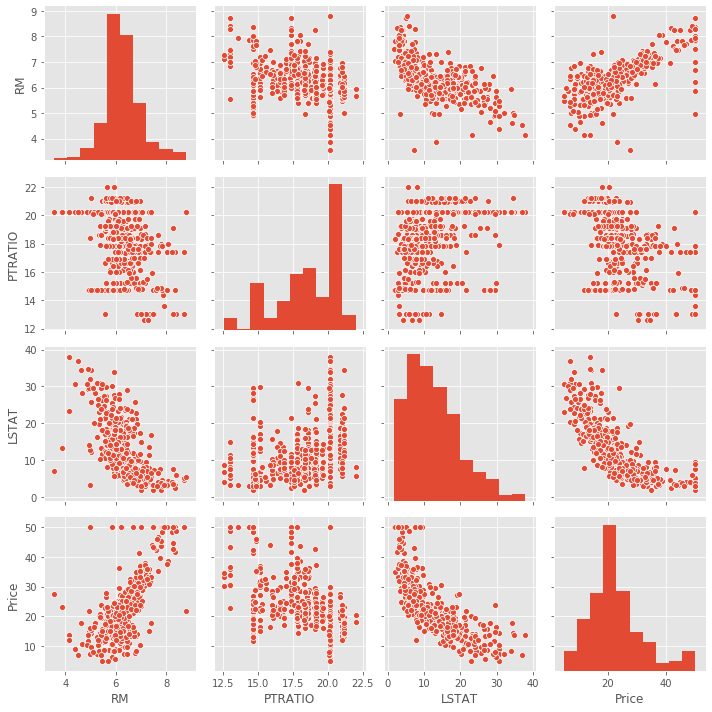

In [41]:
# From Seaborn, create a pairplot of correlated_data
sns.pairplot(correlated_data)
# Show the plot
plt.tight_layout()

#### Heatmap

In the below plot, I have created a heatmap of correlated data. A heatmap is a graphical representation of data that uses a system of color-coding to represent different values. [Ref: Heatmap](https://www.optimizely.com/optimization-glossary/heatmap/)

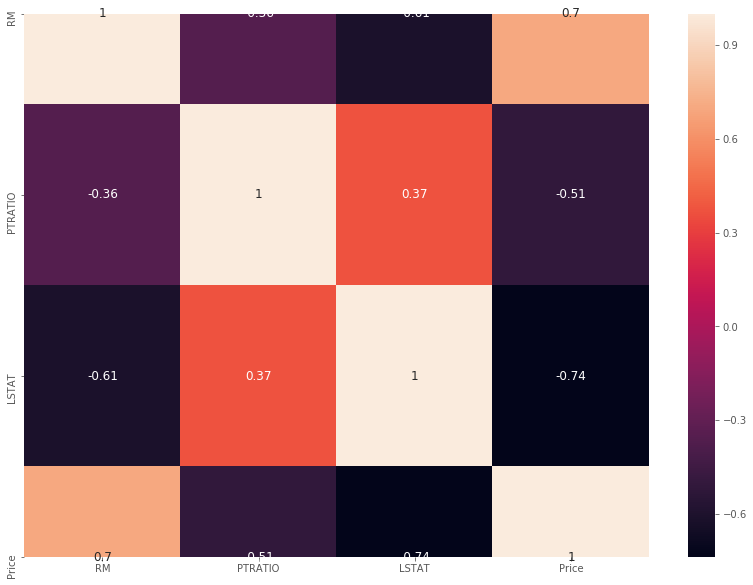

In [42]:
# Create a heatmap of correlated_data
sns.heatmap(correlated_data.corr(), annot=True, annot_kws={'size':12})

### Linear Regression

#### Build a linear regression model

$$ Price = t (RM) + u (PTRATIO) + v (LSTAT) + c $$

In [43]:
# Select inputs for the regression model
x = df[['RM', 'PTRATIO', 'LSTAT']]

In [44]:
# Select output for the regression model
y = df[['PRICE']]

In [45]:
# Create a linear regression model instance.
m = lm.LinearRegression()

In [46]:
# Ask our model to fit the data.
m.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
# Here's our intercept - c
m.intercept_

array([18.56711151])

In [48]:
# Here's our coefficients, in order.
m.coef_

array([[ 4.51542094, -0.93072256, -0.57180569]])

#### R-squared

R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. Whereas correlation explains the strength of the relationship between an independent and dependent variable, R-squared explains to what extent the variance of one variable explains the variance of the second variable. So, if the R2 of a model is 0.50, then approximately half of the observed variation can be explained by the model's inputs. [Ref: R-squared](https://www.investopedia.com/terms/r/r-squared.asp)

An r-squared score is considered is considered to be good when it is close to zero. Therforefore, the r-squared score of 0.67 calculated in our linear regression model below is considered to be very good.

In [49]:
# See how good our fit is.
m.score(x, y)

0.6786241601613111

In [50]:
# Using statsmodels.
import statsmodels.api as sm

# Tell statmodels to include an intercept.
xwithc = sm.add_constant(x)

# Create a model.
msm = sm.OLS(y, xwithc)
# Fit the data.
rsm = msm.fit()
# Print a summary.
print(rsm.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     353.3
Date:                Sat, 14 Dec 2019   Prob (F-statistic):          2.69e-123
Time:                        10:51:01   Log-Likelihood:                -1553.0
No. Observations:                 506   AIC:                             3114.
Df Residuals:                     502   BIC:                             3131.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.5671      3.913      4.745      0.0

C:\Users\fiona\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## Building and training the neural network

### Inputs

In the above section, I have reviewed the boston dataset features and I have selected 'RM', 'PTRATIO', 'LSTAT' as my inputs to my training model because of their correlation with price.

In [51]:
# Create some input values with the RM, PTRATIO and LSTAT columns of the housing dataframe
inputs = df[['RM', 'PTRATIO', 'LSTAT']]
# Take a look at the first 5 values of inputs
inputs.head()

,RM,PTRATIO,LSTAT
0,6.575,15.3,4.98
1,6.421,17.8,9.14
2,7.185,17.8,4.03
3,6.998,18.7,2.94
4,7.147,18.7,5.33


### Output

I have selected 'Price' as the output of my training model as this is the target variable.

In [52]:
# Create output values with the PRICE column of the housing dataframe
output = df[['PRICE']]
output.head()

,PRICE
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [53]:
inputs_train, inputs_test, output_train, output_test = mod.train_test_split(inputs, output, test_size=0.3)

### Idea

The neural network will turn three floating point inputs into one "floating point" output.

$$ [6.575, 15.3, 4.98] \rightarrow [24.0] 
$$

### Building and training

To train the inputs and output of my neural network, I will create a sequential neural network. By creating a sequential neural network, I will build the layers of the network up one by one. 

I will add 2 layers to my neural network. The first layer will have a dimension of 3 because I have 3 inputs - RM, LSTAT and PTRATIO. I will add 20 neurons to the first layer and I will add one neuron to the final layer as we only require one output - Price.

An activation function of "relu" has also been added to the first layer. In artificial neural networks, the activation function of a node defines the output of that node given an input or set of inputs. [Ref:Activation function](https://en.wikipedia.org/wiki/Activation_function). "Relu" stands for rectified linear unit, and is a type of activation function. ReLU is the most commonly used activation function in neural networks. [Ref:Relu](https://medium.com/@danqing/a-practical-guide-to-relu-b83ca804f1f7)

The model is compiled using the loss function "mean squared error". Mean squared error is calculated as the average of the squared differences between the predicted and actual values. The result is always positive regardless of the sign of the predicted and actual values and a perfect value is 0.0. The squaring means that larger mistakes result in more error than smaller mistakes, meaning that the model is punished for making larger mistakes. [Ref:Mean Squared error](https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/)

In [54]:
# Create a new neural network.
m = kr.models.Sequential()

# Add neurons
m.add(kr.layers.Dense(20, input_dim=3, kernel_initializer='normal', activation='relu'))
m.add(kr.layers.Dense(1, kernel_initializer='normal'))                     

# Compile the model.
m.compile(loss="mean_squared_error", optimizer="adam")

In the below code snippet, I will fit the inputs and output train variables to the neural network and I'll do this 100 times in batch sizes of 10.

In [55]:
# Train the model
m.fit(inputs_train, output_train, epochs=100, batch_size=10, verbose=0)

After training the neural network in the input and output values, pass the input_test values through the network and ask it to predict the corresponding output values.

In [56]:
# Run each inputs_test value through the neural network
m.predict(inputs_test).round().T

array([[10., 33., 24., 28., 14., 26., 29., 11., 30., 22., 17., 33., 24.,
        19., 16., 14., 24., 25., 25., 23., 14., 36., 24., 15., 15., 16.,
        34., 18., 20., 27., 29., 21., 25., 23., 12., 17., 19., 12., 11.,
        35., 39., 22., 21., 38., 27., 14., 18., 11., 19., 21., 21., 28.,
        19., 16., 15., 32., 16., 19., 33., 35., 42., 10., 18., 11., 16.,
        19., 10., 40., 29., 24., 17., 12., 38., 28., 21., 19., 20., 19.,
        16., 25.,  9., 22.,  9., 28., 20., 42., 33., 24., 17., 21., 26.,
        28., 15., 28., 28., 32., 26., 19., 18., 12., 27., 15., 17., 24.,
        29., 12., 18., 12., 25., 25., 18., 24., 33., 30., 16., 18., 35.,
        25., 29., 20., 27., 14., 23., 34., 13., 26., 42., 13., 33., 42.,
        19., 23., 22., 18., 19., 33., 16., 32., 38., 21., 13., 25., 12.,
         9., 33., 28., 19., 32., 31., 14., 31., 19.]], dtype=float32)

In [57]:
# Add the output values to numpy array
output_test.as_matrix().astype(np.float32).T

C:\Users\fiona\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


array([[17.8, 32.7, 24.1, 32. ,  7.5, 22.9, 23.1, 14.4, 34.6, 18.4, 18.3,
        26.6, 23.9, 20.6, 22.4, 13.4, 22.2, 27.5, 22.6, 21.7, 13.1, 32. ,
        15. , 21.5, 14.3, 20.3, 36.2, 18.9, 21.4, 29. , 33. , 22.6, 20.2,
        23.9,  6.3, 27.5, 11.7, 15.4,  7.2, 35.4, 50. , 24.7, 21.4, 33.4,
        23.3,  8.8, 24.4, 23.7, 17.2, 23.2, 17.8, 22.1, 22.5, 18.8, 11.7,
        31.6, 16.1, 16.8, 35.4, 32.9, 42.8, 10.2, 18.1,  9.7, 19.8, 22.7,
        14.4, 38.7, 23. , 18.6, 19. ,  7. , 48.5, 28.2, 21.7, 21.8, 20.8,
        19.1, 21.9, 30.3, 11.8, 18.5, 17.9, 25. , 21. , 21.9, 29. , 21.4,
        16.7, 22.6, 22.4, 23.7, 19.4, 23.1, 25.3, 26.6, 25. , 29.6, 17.1,
        20. , 29.1, 17.8, 14.8, 23. , 22.5, 17.2, 19.9, 19.3, 22. , 25.1,
        20.7, 31. , 30.1, 23.7, 15.1, 12.6, 31.7, 16.5, 24.7, 22.2, 30.1,
        18.5, 20.8, 37.9,  8.7, 26.7, 50. , 11.5, 33.2, 50. , 20. , 19.8,
        20.6, 17.4, 17.5, 50. , 17.1, 30.5, 45.4, 19.4, 12.7, 24.5, 17.3,
         8.8, 33.1, 24.2, 27.9, 29.1, 

#### Evaluate

In [58]:
# Find the average mean price for evaluation
m.evaluate(inputs_test, output_test)

152/152 [==============================] - 0s 256us/step


23.685202247218083

In [59]:
# Use pandas to calculate the average price of 'PRICE'
df[['PRICE']].mean()

PRICE    22.532806
dtype: float64

### Scaling

The preprocessing.scale() algorithm puts your data on one scale. This is helpful with largely sparse datasets. In simple words, your data is vastly spread out. It is calculated by subtracting the population mean from an individual raw score and then dividing the difference by the population standard deviation [Ref: Scale](https://stackoverflow.com/questions/42325212/what-preprocessing-scale-do-how-does-it-work/42332663)

I'm going to add pre.StandardScaler() to my model to see if it improves my prediction.

In [60]:
# Assign the sklearn preprocessing Standard Scaler to the variable scaler
scaler = pre.StandardScaler()
# Fit inputs_train
scaler.fit(inputs_train)
# Assign the scaled inputs_train values to the variable inputs_train_scaled
inputs_train_scaled = scaler.transform(inputs_train)

In [61]:
# Create a new neural network.
m = kr.models.Sequential()

# Add neurons
m.add(kr.layers.Dense(20, input_dim=3, kernel_initializer='normal', activation='relu'))
m.add(kr.layers.Dense(1, kernel_initializer='normal'))                     

# Compile the model.
m.compile(loss="mean_squared_error", optimizer="adam")

In [62]:
# Train the model
m.fit(inputs_train_scaled, output_train, epochs=100, batch_size=10, verbose=0)

In [63]:
# Run each scaled_inputs_test values through the neural network
inputs_test_scaled = scaler.transform(inputs_test)
m.predict(inputs_test).round().T

array([[29., 24., 23., 23., 35., 31., 30., 36., 15., 35., 30., 32., 31.,
        35., 32., 37., 32., 27., 29., 34., 36., 33., 31., 27., 39., 26.,
        32., 23., 34., 28., 30., 35., 34., 26., 39., 43., 34., 26., 41.,
        30., 16., 33., 34., 35., 35., 37., 31., 37., 32., 27., 31., 33.,
        31., 30., 37., 28., 34., 33., 24., 29., 33., 43., 37., 41., 32.,
        22., 45., 30., 35., 36., 36., 39., 23., 30., 36., 33., 37., 35.,
        38., 15., 30., 36., 44., 32., 30., 32., 23., 32., 34., 28., 36.,
        35., 24., 35., 32., 34., 33., 29., 28., 36., 29., 32., 37., 37.,
        25., 39., 36., 36., 30., 28., 31., 14., 30., 29., 36., 35., 28.,
        24., 30., 33., 28., 35., 32., 30., 37., 27., 24., 38., 29., 28.,
        35., 35., 30., 33., 37., 13., 35., 25., 24., 31., 40., 32., 36.,
        44., 27., 34., 36., 27., 29., 36., 32., 33.]], dtype=float32)

In [64]:
# Add the output values to numpy array
output_test.as_matrix().astype(np.float32).T

C:\Users\fiona\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


array([[17.8, 32.7, 24.1, 32. ,  7.5, 22.9, 23.1, 14.4, 34.6, 18.4, 18.3,
        26.6, 23.9, 20.6, 22.4, 13.4, 22.2, 27.5, 22.6, 21.7, 13.1, 32. ,
        15. , 21.5, 14.3, 20.3, 36.2, 18.9, 21.4, 29. , 33. , 22.6, 20.2,
        23.9,  6.3, 27.5, 11.7, 15.4,  7.2, 35.4, 50. , 24.7, 21.4, 33.4,
        23.3,  8.8, 24.4, 23.7, 17.2, 23.2, 17.8, 22.1, 22.5, 18.8, 11.7,
        31.6, 16.1, 16.8, 35.4, 32.9, 42.8, 10.2, 18.1,  9.7, 19.8, 22.7,
        14.4, 38.7, 23. , 18.6, 19. ,  7. , 48.5, 28.2, 21.7, 21.8, 20.8,
        19.1, 21.9, 30.3, 11.8, 18.5, 17.9, 25. , 21. , 21.9, 29. , 21.4,
        16.7, 22.6, 22.4, 23.7, 19.4, 23.1, 25.3, 26.6, 25. , 29.6, 17.1,
        20. , 29.1, 17.8, 14.8, 23. , 22.5, 17.2, 19.9, 19.3, 22. , 25.1,
        20.7, 31. , 30.1, 23.7, 15.1, 12.6, 31.7, 16.5, 24.7, 22.2, 30.1,
        18.5, 20.8, 37.9,  8.7, 26.7, 50. , 11.5, 33.2, 50. , 20. , 19.8,
        20.6, 17.4, 17.5, 50. , 17.1, 30.5, 45.4, 19.4, 12.7, 24.5, 17.3,
         8.8, 33.1, 24.2, 27.9, 29.1, 

#### Evaluate

In [65]:
# Find the average mean price for evaluation
m.evaluate(inputs_test_scaled, output_test)

152/152 [==============================] - 0s 223us/step


16.983646944949502

In [66]:
# Use pandas to calculate the average price of 'PRICE'
df[['PRICE']].mean()

PRICE    22.532806
dtype: float64

### Whitening

 The dec.PCA() algorithm is a common way of speeding up a machine learning algorithm by using Principal Component Analysis (PCA). It involves a process called "Whitening" which is a method of removing some of the correlations between variables in a standardised way. I'm also going to try adding this to my model to see if this improves the results of my prediction.

In [67]:
# Assign the sklearn decomposition PCA function to the variable pca
pca = dec.PCA(n_components=3, whiten=True)
# Fit inputs_train
pca.fit(inputs_train)
# Assign the whitened inputs_train values to the variable inputs_train_white
inputs_train_white = pd.DataFrame(pca.transform(inputs_train), columns=inputs.columns)

In [68]:
# Create a new neural network.
m = kr.models.Sequential()

# Add neurons
m.add(kr.layers.Dense(20, input_dim=3, kernel_initializer='normal', activation='relu'))
m.add(kr.layers.Dense(1, kernel_initializer='normal'))                     

# Compile the model.
m.compile(loss="mean_squared_error", optimizer="adam")

In [69]:
# Train the model
m.fit(inputs_train_white, output_train, epochs=100, batch_size=10, verbose=0)

In [70]:
# Run each inputs_test_white value through the neural network
inputs_test_white = scaler.transform(inputs_test)
m.predict(inputs_test).round().T

array([[74., 33., 30., 31., 62., 39., 41., 78., 24., 42., 40., 43., 37.,
        41., 41., 55., 40., 33., 37., 40., 56., 45., 38., 44., 46., 39.,
        43., 34., 40., 36., 39., 41., 41., 32., 74., 54., 40., 55., 76.,
        41., 25., 40., 40., 48., 47., 50., 38., 74., 38., 33., 42., 44.,
        37., 41., 44., 37., 39., 38., 33., 39., 45., 75., 43., 61., 40.,
        31., 85., 41., 47., 43., 43., 56., 32., 39., 42., 40., 45., 40.,
        43., 25., 77., 43., 86., 43., 36., 44., 32., 40., 46., 33., 45.,
        45., 39., 46., 43., 46., 41., 35., 34., 55., 38., 45., 44., 44.,
        34., 63., 41., 58., 38., 34., 37., 30., 40., 39., 43., 42., 39.,
        31., 40., 39., 37., 45., 38., 41., 64., 33., 32., 50., 39., 35.,
        40., 42., 36., 39., 43., 24., 48., 34., 33., 37., 54., 39., 62.,
        75., 36., 44., 42., 36., 39., 57., 43., 39.]], dtype=float32)

In [71]:
# Add the output values to numpy array
output_test.as_matrix().astype(np.float32).T

C:\Users\fiona\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


array([[17.8, 32.7, 24.1, 32. ,  7.5, 22.9, 23.1, 14.4, 34.6, 18.4, 18.3,
        26.6, 23.9, 20.6, 22.4, 13.4, 22.2, 27.5, 22.6, 21.7, 13.1, 32. ,
        15. , 21.5, 14.3, 20.3, 36.2, 18.9, 21.4, 29. , 33. , 22.6, 20.2,
        23.9,  6.3, 27.5, 11.7, 15.4,  7.2, 35.4, 50. , 24.7, 21.4, 33.4,
        23.3,  8.8, 24.4, 23.7, 17.2, 23.2, 17.8, 22.1, 22.5, 18.8, 11.7,
        31.6, 16.1, 16.8, 35.4, 32.9, 42.8, 10.2, 18.1,  9.7, 19.8, 22.7,
        14.4, 38.7, 23. , 18.6, 19. ,  7. , 48.5, 28.2, 21.7, 21.8, 20.8,
        19.1, 21.9, 30.3, 11.8, 18.5, 17.9, 25. , 21. , 21.9, 29. , 21.4,
        16.7, 22.6, 22.4, 23.7, 19.4, 23.1, 25.3, 26.6, 25. , 29.6, 17.1,
        20. , 29.1, 17.8, 14.8, 23. , 22.5, 17.2, 19.9, 19.3, 22. , 25.1,
        20.7, 31. , 30.1, 23.7, 15.1, 12.6, 31.7, 16.5, 24.7, 22.2, 30.1,
        18.5, 20.8, 37.9,  8.7, 26.7, 50. , 11.5, 33.2, 50. , 20. , 19.8,
        20.6, 17.4, 17.5, 50. , 17.1, 30.5, 45.4, 19.4, 12.7, 24.5, 17.3,
         8.8, 33.1, 24.2, 27.9, 29.1, 

#### Evaluate

In [72]:
# Find the average mean price for evaluation
m.evaluate(inputs_test, output_test)

152/152 [==============================] - 0s 217us/step


739.6994018554688

In [73]:
# Use pandas to calculate the average price of 'PRICE'
df[['PRICE']].mean()

PRICE    22.532806
dtype: float64

### Add more neurons

In a further attempt to improve the prediction results of my model, I'm going to try adding more neurons to the first layer.

In [74]:
# Create a new neural network.
m = kr.models.Sequential()

# Add neurons
m.add(kr.layers.Dense(100, input_dim=3, kernel_initializer='normal', activation='relu'))
m.add(kr.layers.Dense(1, kernel_initializer='normal'))                     

# Compile the model
m.compile(loss="mean_squared_error", optimizer="adam")

In [75]:
# Train the model
m.fit(inputs_train, output_train, epochs=100, batch_size=10,verbose=0)

In [76]:
# Run each inputs_test_white value through the neural network
m.predict(inputs_test).round().T

array([[11., 34., 24., 29., 16., 24., 27., 10., 33., 20., 17., 31., 23.,
        17., 16., 14., 22., 25., 24., 20., 15., 36., 24., 16., 13., 17.,
        32., 19., 19., 26., 28., 19., 22., 23., 11., 10., 17., 14.,  8.,
        34., 45., 20., 19., 36., 23., 14., 18., 10., 18., 21., 22., 25.,
        19., 16., 14., 31., 14., 17., 34., 35., 43.,  7., 17.,  9., 16.,
        20.,  6., 41., 25., 21., 15., 11., 41., 27., 19., 17., 17., 17.,
        12., 29.,  9., 19.,  5., 25., 19., 42., 34., 23., 17., 20., 23.,
        25., 17., 25., 26., 30., 24., 19., 18., 11., 26., 15., 15., 20.,
        29., 11., 16., 11., 24., 24., 18., 28., 32., 29., 14., 17., 35.,
        25., 27., 19., 26., 13., 21., 34., 13., 26., 46., 11., 33., 45.,
        17., 20., 21., 16., 17., 38., 16., 32., 41., 19., 12., 23., 12.,
         5., 33., 25., 17., 32., 30., 15., 29., 17.]], dtype=float32)

In [77]:
# Add the output values to numpy array
output_test.as_matrix().astype(np.float32).T

C:\Users\fiona\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


array([[17.8, 32.7, 24.1, 32. ,  7.5, 22.9, 23.1, 14.4, 34.6, 18.4, 18.3,
        26.6, 23.9, 20.6, 22.4, 13.4, 22.2, 27.5, 22.6, 21.7, 13.1, 32. ,
        15. , 21.5, 14.3, 20.3, 36.2, 18.9, 21.4, 29. , 33. , 22.6, 20.2,
        23.9,  6.3, 27.5, 11.7, 15.4,  7.2, 35.4, 50. , 24.7, 21.4, 33.4,
        23.3,  8.8, 24.4, 23.7, 17.2, 23.2, 17.8, 22.1, 22.5, 18.8, 11.7,
        31.6, 16.1, 16.8, 35.4, 32.9, 42.8, 10.2, 18.1,  9.7, 19.8, 22.7,
        14.4, 38.7, 23. , 18.6, 19. ,  7. , 48.5, 28.2, 21.7, 21.8, 20.8,
        19.1, 21.9, 30.3, 11.8, 18.5, 17.9, 25. , 21. , 21.9, 29. , 21.4,
        16.7, 22.6, 22.4, 23.7, 19.4, 23.1, 25.3, 26.6, 25. , 29.6, 17.1,
        20. , 29.1, 17.8, 14.8, 23. , 22.5, 17.2, 19.9, 19.3, 22. , 25.1,
        20.7, 31. , 30.1, 23.7, 15.1, 12.6, 31.7, 16.5, 24.7, 22.2, 30.1,
        18.5, 20.8, 37.9,  8.7, 26.7, 50. , 11.5, 33.2, 50. , 20. , 19.8,
        20.6, 17.4, 17.5, 50. , 17.1, 30.5, 45.4, 19.4, 12.7, 24.5, 17.3,
         8.8, 33.1, 24.2, 27.9, 29.1, 

In [78]:
# Find the average mean price for evaluation
m.evaluate(inputs_test, output_test)

152/152 [==============================] - 0s 243us/step


22.238483428955078

In [79]:
# Use pandas to calculate the average price of 'PRICE'
df[['PRICE']].mean()

PRICE    22.532806
dtype: float64

### Add new inputs

In [80]:
df[['INDUS', 'NOX', 'TAX', 'RM', 'PTRATIO', 'LSTAT']].skew()

INDUS      0.295022
NOX        0.729308
TAX        0.669956
RM         0.403612
PTRATIO   -0.802325
LSTAT      0.906460
dtype: float64

In [81]:
# Create some input values with the RM, PTRATIO and LSTAT columns of the housing dataframe
newinputs = df[['INDUS', 'NOX', 'TAX', 'RM', 'PTRATIO', 'LSTAT']]
# Take a look at the first 5 values of inputs
newinputs.head()

,INDUS,NOX,TAX,RM,PTRATIO,LSTAT
0,2.31,0.538,296,6.575,15.3,4.98
1,7.07,0.469,242,6.421,17.8,9.14
2,7.07,0.469,242,7.185,17.8,4.03
3,2.18,0.458,222,6.998,18.7,2.94
4,2.18,0.458,222,7.147,18.7,5.33


In [82]:
newinputs_train, newinputs_test, output_train, output_test = mod.train_test_split(newinputs, output, test_size=0.3)

In [83]:
# Create a new neural network.
m = kr.models.Sequential()

# Add neurons
m.add(kr.layers.Dense(20, input_dim=6, kernel_initializer='normal', activation='relu'))
m.add(kr.layers.Dense(1, kernel_initializer='normal'))                     

# Compile the model.
m.compile(loss="mean_squared_error", optimizer="adam")

In [84]:
# Train the model
m.fit(newinputs_train, output_train, epochs=100, batch_size=10,verbose=0)

In [85]:
# Run each inputs_test value through the neural network
m.predict(newinputs_test).round().T

array([[21., 21., 32., 15., 10., 32., 21., 21., 16., 27., 30., 29., 27.,
        16., 25., 21., 23., 28., 31., 15., 37., 13.,  7., 33., 13., 35.,
        29., 22., 17., 14., 25., 27., 33., 24., 20., 31., 28., 16., 20.,
        30., 24., 13., 17., 13., 19., 21., 27., 34., 18., 15., 15., 28.,
        20., 18., 21., 17., 31., 31., 28., 17., 30., 31., 15., 15., 33.,
        17., 29., 25., 14., 21., 18., 18., 13., 12.,  7., 22.,  9., 14.,
        31., 19., 25., 24., 24., 14., 25., 23., 12., 20., 11., 23., 24.,
        22., 22., 33.,  9., 27., 22., 25., 32., 31., 28., 19., 14., 25.,
        22., 19., 29., 28., 13., 31., 23., 20., 20., 21., 31.,  8., 25.,
         8., 30., 17., 21., 21., 25., 19., 13., 11., 29., 24., 23., 26.,
        18., 25., 17., 14., 18., 28., 16., 13., 11., 16., 23., 24., 28.,
        29., 29., 20., 22., 31., 28., 29., 15., 23.]], dtype=float32)

In [86]:
# Add the output values to numpy array
output_test.as_matrix().astype(np.float32).T

C:\Users\fiona\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


array([[31. , 22.7, 37.2, 20.4, 17.2, 50. , 19.3, 20.9, 14.9, 23.5, 48.8,
        24.1, 28.6, 13.4, 21. , 21.2, 23.9, 21.1, 33.2, 18.8, 41.7,  8.5,
        14.6, 50. , 27.1, 48.3, 23. , 19.3, 19.5, 12.1, 19.6, 22.9, 50. ,
        36.5, 19.3, 24.6, 41.3, 23.8, 18. , 28.7, 18.4, 23.1, 22.7, 13.1,
        23.2, 20. , 20.6, 37.3, 20.6, 23.1, 13.3, 50. , 19.4, 10.9, 22.2,
        15.6, 28.7, 26.6, 25.3, 15.2, 26.5, 36.4, 19. , 23.1, 50. , 16.1,
        22.2, 25. ,  7.2, 22.2, 20. , 17.4, 19.1, 11.5, 11.8, 22. , 15.6,
        19.4, 31.7, 16. , 23.2, 24.3, 18.9, 17.2, 34.6, 22. , 12.8, 22. ,
         7.2, 22.8, 26.4, 19.8, 21.4, 46. , 13.8, 24.6, 21.7, 23.9, 36.2,
        30.1, 24. , 18.4, 12.7, 32. , 22.6, 20.7, 26.2, 23.9, 13.1, 33.1,
        24.1, 17.2, 17.5, 20.3, 42.3, 14.4, 21.9, 10.5, 31.2, 13.8, 24. ,
        20.8, 21.4, 19.9, 10.2,  7. , 26.6, 23.6, 19.2, 21.6, 17.1, 18.2,
        13.9, 19.1, 19.7, 34.9, 22.5, 11.8,  5.6, 21.5, 20.3, 36.2, 25.2,
        33. , 33.1, 21.4, 33.8, 33.2, 

#### Evaluate

In [87]:
# Find the average mean price for evaluation
m.evaluate(newinputs_test, output_test)

152/152 [==============================] - 0s 217us/step


36.69655157390394

In [88]:
# Use pandas to calculate the average price of 'PRICE'
df[['PRICE']].mean()

PRICE    22.532806
dtype: float64

### End